In [2]:
import pygame
import numpy as np
import random

# Initialize Pygame
pygame.init()

# Set colors
white = (255, 255, 255)
black = (0, 0, 0)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)

# Set display dimensions
width = 600
height = 400
display = pygame.display.set_mode((width, height))
pygame.display.set_caption('Snake Game with RL')

# Set clock and snake block size
clock = pygame.time.Clock()
snake_block = 10
snake_speed = 15

# Define actions
UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3
actions = [UP, DOWN, LEFT, RIGHT]

class SnakeGame:
    def __init__(self):
        self.reset()

    def reset(self):
        self.snake_pos = [[100, 50], [90, 50], [80, 50]]
        self.food_pos = [random.randrange(1, (width // snake_block)) * snake_block,
                         random.randrange(1, (height // snake_block)) * snake_block]
        self.direction = RIGHT
        self.score = 0
        self.game_over = False

    def step(self, action):
        if action == UP:
            self.direction = UP if self.direction != DOWN else DOWN
        elif action == DOWN:
            self.direction = DOWN if self.direction != UP else UP
        elif action == LEFT:
            self.direction = LEFT if self.direction != RIGHT else RIGHT
        elif action == RIGHT:
            self.direction = RIGHT if self.direction != LEFT else LEFT

        head = self.snake_pos[0].copy()
        if self.direction == UP:
            head[1] -= snake_block
        elif self.direction == DOWN:
            head[1] += snake_block
        elif self.direction == LEFT:
            head[0] -= snake_block
        elif self.direction == RIGHT:
            head[0] += snake_block

        # Check for collision with food
        if head == self.food_pos:
            self.score += 1
            self.food_pos = [random.randrange(1, (width // snake_block)) * snake_block,
                             random.randrange(1, (height // snake_block)) * snake_block]
        else:
            self.snake_pos.pop()  # Remove last segment

        # Check for collisions with walls or itself
        if (head[0] < 0 or head[0] >= width or head[1] < 0 or head[1] >= height or 
                head in self.snake_pos):
            self.game_over = True
        else:
            self.snake_pos.insert(0, head)  # Add new head

        return self.score, self.game_over

    def render(self):
        display.fill(blue)
        for pos in self.snake_pos:
            pygame.draw.rect(display, black, [pos[0], pos[1], snake_block, snake_block])
        pygame.draw.rect(display, green, [self.food_pos[0], self.food_pos[1], snake_block, snake_block])
        pygame.display.update()

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [59]:
import pygame
import numpy as np
import random

# Инициализация Pygame
pygame.init()

# Определение цветов
COLOR_WHITE = (255, 255, 255)
COLOR_BLACK = (0, 0, 0)
COLOR_RED = (213, 50, 80)
COLOR_GREEN = (0, 255, 0)
COLOR_BLUE = (50, 153, 213)

# Установка размеров экрана
SCREEN_WIDTH = 600
SCREEN_HEIGHT = 400
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption('Snake Game with Reinforcement Learning')

# Установка времени и размера блока змеи
game_clock = pygame.time.Clock()
BLOCK_SIZE = 10
SNAKE_SPEED = 15

# Определение направлений
DIRECTION_UP = 0
DIRECTION_DOWN = 1
DIRECTION_LEFT = 2
DIRECTION_RIGHT = 3
possible_actions = [DIRECTION_UP, DIRECTION_DOWN, DIRECTION_LEFT, DIRECTION_RIGHT]

class SnakeGame:
    def __init__(self):
        self.initialize_game()

    def initialize_game(self):
        self.snake_body = [[100, 50], [90, 50], [80, 50]]
        self.food_position = [random.randrange(1, (SCREEN_WIDTH // BLOCK_SIZE)) * BLOCK_SIZE,
                              random.randrange(1, (SCREEN_HEIGHT // BLOCK_SIZE)) * BLOCK_SIZE]
        self.current_direction = DIRECTION_RIGHT
        self.score = 0
        self.is_game_over = False

    def update(self, action):
        if action == DIRECTION_UP:
            self.current_direction = DIRECTION_UP if self.current_direction != DIRECTION_DOWN else DIRECTION_DOWN
        elif action == DIRECTION_DOWN:
            self.current_direction = DIRECTION_DOWN if self.current_direction != DIRECTION_UP else DIRECTION_UP
        elif action == DIRECTION_LEFT:
            self.current_direction = DIRECTION_LEFT if self.current_direction != DIRECTION_RIGHT else DIRECTION_RIGHT
        elif action == DIRECTION_RIGHT:
            self.current_direction = DIRECTION_RIGHT if self.current_direction != DIRECTION_LEFT else DIRECTION_LEFT

        head_position = self.snake_body[0].copy()
        if self.current_direction == DIRECTION_UP:
            head_position[1] -= BLOCK_SIZE
        elif self.current_direction == DIRECTION_DOWN:
            head_position[1] += BLOCK_SIZE
        elif self.current_direction == DIRECTION_LEFT:
            head_position[0] -= BLOCK_SIZE
        elif self.current_direction == DIRECTION_RIGHT:
            head_position[0] += BLOCK_SIZE

        # Проверка на столкновение с едой
        if head_position == self.food_position:
            self.score += 1
            self.food_position = [random.randrange(1, (SCREEN_WIDTH // BLOCK_SIZE)) * BLOCK_SIZE,
                                  random.randrange(1, (SCREEN_HEIGHT // BLOCK_SIZE)) * BLOCK_SIZE]
        else:
            self.snake_body.pop()  # Удалить последний сегмент

        # Проверка на столкновение со стенами или самим собой
        if (head_position[0] < 0 or head_position[0] >= SCREEN_WIDTH or
                head_position[1] < 0 or head_position[1] >= SCREEN_HEIGHT or
                head_position in self.snake_body):
            self.is_game_over = True
        else:
            self.snake_body.insert(0, head_position)  # Добавить новую голову

        return self.score, self.is_game_over

    def draw(self):
        screen.fill(COLOR_BLUE)
        for segment in self.snake_body:
            pygame.draw.rect(screen, COLOR_BLACK, [segment[0], segment[1], BLOCK_SIZE, BLOCK_SIZE])
        pygame.draw.rect(screen, COLOR_GREEN, [self.food_position[0], self.food_position[1], BLOCK_SIZE, BLOCK_SIZE])
        pygame.display.update()


In [50]:
import pygame
import random
from enum import Enum
from collections import namedtuple
import numpy as np

class Direction(Enum):
    RIGHT = 1
    LEFT = 2
    UP = 3
    DOWN = 4

Point = namedtuple("Point", "x, y")

# we substitute pygame.init() for the explicit init of inititng the display and fonts
# this will prevent sound init, which may cause issues on notebooks
pygame.display.init()
pygame.font.init()

font = pygame.font.Font(pygame.font.get_default_font(), 25)

# rgb colors
WHITE = (255, 255, 255)
RED = (200,0,0)
BLUE1 = (0, 0, 255)
BLUE2 = (0, 100, 255)
BLACK = (0,0,0)

BLOCK_SIZE = 20
SPEED = 120

class SillySnakeGameAi:

    def __init__(self, width=640, height=480, playerName="Player"):
        self.w = width
        self.h = height
        self.playerName = playerName

        # init display

        self.display = pygame.display.set_mode((self.w, self.h))
        pygame.display.set_caption("Silly Snake")
        self.clock = pygame.time.Clock()

        # init game
        self.reset()

    def reset(self):
        self.direction = Direction.RIGHT
        self.head = Point(self.w / 2, self.h / 2)
        self.snake = [self.head,
                      Point(self.head.x - BLOCK_SIZE, self.head.y),
                      Point(self.head.x - (2 * BLOCK_SIZE), self.head.y)]

        self.score = 0
        self.food = None

        self.placeFood()

        self.frameIteration = 0


    def placeFood(self):
        x = random.randint(0, (self.w-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE
        y = random.randint(0, (self.h-BLOCK_SIZE )//BLOCK_SIZE )*BLOCK_SIZE
        self.food = Point(x, y)
        if self.food in self.snake:
            self.placeFood()

    def playStep(self, action):
        # increment frame iteration

        self.frameIteration += 1

        for event in pygame.event.get():
            if event == pygame.QUIT:
                pygame.quit()
                quit()

        # 2. move the snake, asta creste si marimea sarpelui
        self.moveSnake(action)

        # reward stuff
        reward = 0

        # 3. check if game over

        if self.isCollision() or self.frameIteration > 100 * len(self.snake):
            gameOver = True

            reward -= 10

            return reward, gameOver, self.score, self.frameIteration

        # 4. move snake or place food

        if self.head == self.food:
            self.score += 1
            reward = 10
            self.placeFood()
        else:
            self.snake.pop()

        # 5. update ui and clock
        self.updateUi()
        self.clock.tick(SPEED)
        # 6. return game over and score
        gameOver = False

        return reward, gameOver, self.score, self.frameIteration

    def isCollision(self, p: Point = None):

        if p == None:
            p = self.head

        #check if it hits border
        if p.x > self.w - BLOCK_SIZE or p.x < 0:
            return True

        if p.y > self.h - BLOCK_SIZE or p.y < 0:
            return True

        # check if it hits itself

        if p in self.snake[1:]:
            return True

        return False

    def moveSnake(self, action):

        # action -> [straigth, right, left]
        clockWiseDirections = [Direction.RIGHT, Direction.DOWN, Direction.LEFT, Direction.UP]
        currentDirectionIndex = clockWiseDirections.index(self.direction)

        newDirection = self.direction

        if np.array_equal(action, [0, 1, 0]):
            newDirection = clockWiseDirections[(currentDirectionIndex + 1) % 4]
        elif np.array_equal(action, [0, 1, 0]):
            newDirection = clockWiseDirections[(currentDirectionIndex - 1) % 4]
        
        
        self.direction = newDirection

        x = self.head.x
        y = self.head.y

        if self.direction == Direction.RIGHT:
            x += BLOCK_SIZE
        elif self.direction == Direction.LEFT:
            x -= BLOCK_SIZE
        elif self.direction == Direction.DOWN:
            y += BLOCK_SIZE
        elif self.direction == Direction.UP:
            y -= BLOCK_SIZE

        self.head = Point(x, y)

        # this grows the size of our snake
        self.snake.insert(0, self.head)


    def updateUi(self):
        self.display.fill(BLACK)

        for p in self.snake:
            pygame.draw.rect(self.display, COLOR_GREEN, pygame.Rect(p.x, p.y, BLOCK_SIZE, BLOCK_SIZE))
            pygame.draw.rect(self.display, BLUE2, pygame.Rect(p.x + 4, p.y + 4, 12, 12))

        pygame.draw.rect(self.display, RED, pygame.Rect(self.food.x, self.food.y, BLOCK_SIZE, BLOCK_SIZE))

        scoreText = font.render("Score: " + str(self.score) + " Speed: " + str(SPEED) + " Player: " + self.playerName, True, WHITE)

        self.display.blit(scoreText, [0, 0])

        pygame.display.flip()


    def setPlayerName(self, name):
        self.playerName = name

In [68]:
import pygame
import random
from enum import Enum
from collections import namedtuple
import numpy as np

class Movement(Enum):
    RIGHT = 1
    LEFT = 2
    UP = 3
    DOWN = 4

Coordinate = namedtuple("Coordinate", "x, y")

# Инициализация Pygame
pygame.display.init()
pygame.font.init()

font = pygame.font.Font(pygame.font.get_default_font(), 25)

# RGB цвета
COLOR_WHITE = (255, 255, 255)
COLOR_RED = (200, 0, 0)
COLOR_GREEN = (0, 0, 255)
COLOR_BLUE2 = (0, 100, 255)
COLOR_BLACK = (0, 0, 0)

BLOCK_DIMENSION = 20
GAME_SPEED = 120

class SimpleSnakeGameAI:

    def __init__(self, width=640, height=480, player_name="Player"):
        self.width = width
        self.height = height
        self.player_name = player_name

        # Инициализация дисплея
        self.display = pygame.display.set_mode((self.width, self.height))
        pygame.display.set_caption("Simple Snake")
        self.clock = pygame.time.Clock()

        # Инициализация игры
        self.restart()

    def restart(self):
        self.direction = Movement.RIGHT
        self.head_position = Coordinate(self.width / 2, self.height / 2)
        self.snake_body = [self.head_position,
                           Coordinate(self.head_position.x - BLOCK_DIMENSION, self.head_position.y),
                           Coordinate(self.head_position.x - (2 * BLOCK_DIMENSION), self.head_position.y)]

        self.score = 0
        self.food_position = None

        self.spawn_food()

        self.frame_count = 0

    def spawn_food(self):
        x = random.randint(0, (self.width - BLOCK_DIMENSION) // BLOCK_DIMENSION) * BLOCK_DIMENSION
        y = random.randint(0, (self.height - BLOCK_DIMENSION) // BLOCK_DIMENSION) * BLOCK_DIMENSION
        self.food_position = Coordinate(x, y)
        if self.food_position in self.snake_body:
            self.spawn_food()

    def play_turn(self, action):
        # Увеличиваем количество кадров
        self.frame_count += 1

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        # Перемещаем змею
        self.move_snake(action)

        reward = 0

        # Проверяем окончание игры
        if self.check_collision() or self.frame_count > 100 * len(self.snake_body):
            game_over = True
            reward -= 10
            return reward, game_over, self.score, self.frame_count

        # Перемещение змеи или размещение еды
        if self.head_position == self.food_position:
            self.score += 1
            reward = 10
            self.spawn_food()
        else:
            self.snake_body.pop()

        # Обновляем интерфейс и время
        self.update_display()
        self.clock.tick(GAME_SPEED)

        game_over = False

        return reward, game_over, self.score, self.frame_count

    def check_collision(self, point: Coordinate = None):
        if point is None:
            point = self.head_position

        # Проверка на столкновение со стенами
        if point.x > self.width - BLOCK_DIMENSION or point.x < 0:
            return True

        if point.y > self.height - BLOCK_DIMENSION or point.y < 0:
            return True

        # Проверка на столкновение с телом змеи
        if point in self.snake_body[1:]:
            return True

        return False

    def move_snake(self, action):
        # Действие -> [прямо, вправо, влево]
        direction_sequence = [Movement.RIGHT, Movement.DOWN, Movement.LEFT, Movement.UP]
        current_index = direction_sequence.index(self.direction)

        new_direction = self.direction

        if np.array_equal(action, [0, 1, 0]):
            new_direction = direction_sequence[(current_index + 1) % 4]
        elif np.array_equal(action, [0, -1, 0]):
            new_direction = direction_sequence[(current_index - 1) % 4]

        self.direction = new_direction

        x = self.head_position.x
        y = self.head_position.y

        if self.direction == Movement.RIGHT:
            x += BLOCK_DIMENSION
        elif self.direction == Movement.LEFT:
            x -= BLOCK_DIMENSION
        elif self.direction == Movement.UP:
            y -= BLOCK_DIMENSION
        elif self.direction == Movement.DOWN:
            y += BLOCK_DIMENSION

        self.head_position = Coordinate(x, y)
        self.snake_body.insert(0, self.head_position)

    def update_display(self):
        self.display.fill(COLOR_BLACK)

        for p in self.snake_body:
            pygame.draw.rect(self.display, BLUE1, pygame.Rect(p.x, p.y, BLOCK_SIZE, BLOCK_SIZE))
            pygame.draw.rect(self.display, BLUE2, pygame.Rect(p.x + 4, p.y + 4, 12, 12))

        pygame.draw.rect(self.display, RED, pygame.Rect(self.food_position.x, self.food_position.y, BLOCK_SIZE, BLOCK_SIZE))

        scoreText = font.render("Score: " + str(self.score) + " Speed: " + str(SPEED) + " Player: " + self.playerName, True, WHITE)

        self.display.blit(scoreText, [0, 0])

        pygame.display.flip()


    def setPlayerName(self, name):
        self.playerName = name

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class LinearQNet(nn.Module):

    def __init__(self, inputSize, hiddenSize, outputSize):
        super().__init__()

        self.linear1 = nn.Linear(inputSize, hiddenSize)
        self.linear2 = nn.Linear(hiddenSize, outputSize)

    def forward(self, X):
        out = self.linear1(X)
        out = F.relu(out)
        out = self.linear2(out)

        return out

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class QTrainner:

    def __init__(self, model, lr, gamma):
        self.model = model
        self.lr = lr
        self.gamma = gamma

        self.optimizer = optim.Adam(model.parameters(), self.lr)
        self.lossFunction = nn.MSELoss()

    def trainStep(self, state, action, reward, newState, done):

        stateTensor = torch.tensor(state, dtype=torch.float)
        actionTensor = torch.tensor(action, dtype=torch.long)
        rewardTensor = torch.tensor(reward, dtype=torch.float)
        newStateTensor = torch.tensor(newState, dtype=torch.float)

        if len(stateTensor.shape) == 1:
            stateTensor = torch.unsqueeze(stateTensor, 0)
            newStateTensor = torch.unsqueeze(newStateTensor, 0)
            actionTensor = torch.unsqueeze(actionTensor, 0)
            rewardTensor = torch.unsqueeze(rewardTensor, 0)
            done = (done, )

        # 1. predicted q values with current state
        prediction = self.model(stateTensor)

        # Q_new = 2. reward + gamma * max(next predicted q value) -> only do this if not done
        target = prediction.clone()

        for i in range(len(done)):
            Qnew = rewardTensor[i]

            if not done[i]:
                Qnew = rewardTensor[i] + self.gamma * torch.max(self.model(newStateTensor[i]))

            target[i][torch.argmax(actionTensor).item()] = Qnew


        self.optimizer.zero_grad()
        loss = self.lossFunction(target, prediction)
        loss.backward()

        self.optimizer.step()

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class QTrainer:

    def __init__(self, neural_network, learning_rate, discount_factor):
        self.neural_network = neural_network
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor

        self.optimizer = optim.Adam(neural_network.parameters(), self.learning_rate)
        self.loss_function = nn.MSELoss()

    def perform_training_step(self, current_state, chosen_action, received_reward, next_state, is_done):

        current_state_tensor = torch.tensor(current_state, dtype=torch.float)
        chosen_action_tensor = torch.tensor(chosen_action, dtype=torch.long)
        received_reward_tensor = torch.tensor(received_reward, dtype=torch.float)
        next_state_tensor = torch.tensor(next_state, dtype=torch.float)

        if len(current_state_tensor.shape) == 1:
            current_state_tensor = torch.unsqueeze(current_state_tensor, 0)
            next_state_tensor = torch.unsqueeze(next_state_tensor, 0)
            chosen_action_tensor = torch.unsqueeze(chosen_action_tensor, 0)
            received_reward_tensor = torch.unsqueeze(received_reward_tensor, 0)
            is_done = (is_done,)

        # 1. Предсказанные Q-значения для текущего состояния
        predictions = self.neural_network(current_state_tensor)

        # Q_new = 2. Награда + discount_factor * max(next predicted q value) -> только если не завершено
        target_values = predictions.clone()

        for i in range(len(is_done)):
            Q_new = received_reward_tensor[i]

            if not is_done[i]:
                Q_new = received_reward_tensor[i] + self.discount_factor * torch.max(self.neural_network(next_state_tensor[i]))

            target_values[i][torch.argmax(chosen_action_tensor).item()] = Q_new

        self.optimizer.zero_grad()
        loss_value = self.loss_function(target_values, predictions)
        loss_value.backward()

        self.optimizer.step()


In [65]:
import torch 
import random 
import numpy as np 
from collections import deque 

MAX_MEMORY = 100_000 
BATCH_SIZE = 1000 
LR = 0.001 

class Agent: 
    def __init__(self): 
        self.numberOfGames = 0 
        # controls randomness 
        self.epsilon = 0  # Убираем использование epsilon
        # discount rate 
        self.gamma = 1 
        # the last actions, if we reach the limit we will remove the oldest 
        self.memory = deque(maxlen=MAX_MEMORY) 

        # the model needs to have 11 inputs, as our world status grid has 11 elements and the output is 3, as we have 3 directions 
        self.model = LinearQNet(11, 256, 3) 
        self.trainner = QTrainner(self.model, lr=LR, gamma=self.gamma) 

    # this gives us the state of the world 
    def getState(self, game): 
        head = game.head 

        point_left = Point(head.x - BLOCK_SIZE, head.y) 
        point_right = Point(head.x + BLOCK_SIZE, head.y) 
        point_up = Point(head.x, head.y - BLOCK_SIZE) 
        point_down = Point(head.x, head.y + BLOCK_SIZE) 

        direction_left = game.direction == Direction.LEFT 
        direction_right = game.direction == Direction.RIGHT 
        direction_up = game.direction == Direction.UP 
        direction_down = game.direction == Direction.DOWN 

        state = [ 
            # Danger straight 
            (direction_right and game.isCollision(point_right)) or 
            (direction_left and game.isCollision(point_left)) or 
            (direction_up and game.isCollision(point_up)) or 
            (direction_down and game.isCollision(point_down)), 

            # Danger right 
            (direction_up and game.isCollision(point_right)) or 
            (direction_down and game.isCollision(point_left)) or 
            (direction_left and game.isCollision(point_up)) or 
            (direction_right and game.isCollision(point_down)), 

            # Danger left 
            (direction_down and game.isCollision(point_right)) or 
            (direction_up and game.isCollision(point_left)) or 
            (direction_right and game.isCollision(point_up)) or 
            (direction_left and game.isCollision(point_down)), 

            # Move direction 
            direction_left, 
            direction_right, 
            direction_up, 
            direction_down, 

            # Food location 
            game.food.x < game.head.x,  # food left 
            game.food.x > game.head.x,  # food right 
            game.food.y < game.head.y,  # food up 
            game.food.y > game.head.y  # food down 
        ] 

        return np.array(state, dtype=int) 

    def remember(self, state, action, reward, nextState, done): 
        self.memory.append((state, action, reward, nextState, done)) 

    def trainLongMemory(self): 
        if len(self.memory) < BATCH_SIZE: 
            sample = self.memory 
        else: 
            sample = random.sample(self.memory, BATCH_SIZE) 

        states, actions, rewards, nextStates, dones = zip(*sample) 
        self.trainner.trainStep(states, actions, rewards, nextStates, dones) 

    def trainShortMemory(self, state, action, reward, nextState, done): 
        self.trainner.trainStep(state, action, reward, nextState, done) 

    def getAction(self, state):
        finalMove = [0, 0, 0]
        
        # Всегда выбираем случайное действие

In [75]:
import torch   
import random   
import numpy as np   
from collections import deque   

MAX_MEMORY_SIZE = 100_000   
BATCH_SIZE = 1000   
LEARNING_RATE = 0.001   

class GameAgent:   
    def __init__(self):   
        self.games_played = 0   
        self.epsilon = 0  # Убираем использование epsilon  
        self.discount_factor = 1   
        self.memory_buffer = deque(maxlen=MAX_MEMORY_SIZE)   

        # Модель принимает 11 входов и выдаёт 3 направления 
        self.neural_network = LinearQNet(11, 256, 3)   
        self.trainer = QTrainer(self.neural_network, learning_rate=LEARNING_RATE, discount_factor=self.discount_factor)   

    # Получаем состояние игры 
    def retrieve_state(self, game):   
        head_position = game.head_position 

        left_point = Coordinate(head_position.x - BLOCK_SIZE, head_position.y)   
        right_point = Coordinate(head_position.x + BLOCK_SIZE, head_position.y)   
        up_point = Coordinate(head_position.x, head_position.y - BLOCK_SIZE)   
        down_point = Coordinate(head_position.x, head_position.y + BLOCK_SIZE)   

        is_moving_left = game.direction == Movement.LEFT   
        is_moving_right = game.direction == Movement.RIGHT   
        is_moving_up = game.direction == Movement.UP   
        is_moving_down = game.direction == Movement.DOWN   

        state_vector = [   
            # Опасность впереди   
            (is_moving_right and game.check_collision(right_point)) or   
            (is_moving_left and game.check_collision(left_point)) or   
            (is_moving_up and game.check_collision(up_point)) or   
            (is_moving_down and game.check_collision(down_point)),   

            # Опасность справа   
            (is_moving_up and game.check_collision(right_point)) or   
            (is_moving_down and game.check_collision(left_point)) or   
            (is_moving_left and game.check_collision(up_point)) or   
            (is_moving_right and game.check_collision(down_point)),   

            # Опасность слева   
            (is_moving_down and game.check_collision(right_point)) or   
            (is_moving_up and game.check_collision(left_point)) or   
            (is_moving_right and game.check_collision(up_point)) or   
            (is_moving_left and game.check_collision(down_point)),   

            # Направление движения   
            is_moving_left,   
            is_moving_right,   
            is_moving_up,   
            is_moving_down,   

            # Положение еды   
            game.food_position.x < head_position.x,  # еда слева   
            game.food_position.x > head_position.x,  # еда справа   
            game.food_position.y < head_position.y,  # еда выше   
            game.food_position.y > head_position.y  # еда ниже   
        ]   

        return np.array(state_vector, dtype=int)   

    def store_experience(self, state, action, reward, next_state, is_done):   
        self.memory_buffer.append((state, action, reward, next_state, is_done))   

    def train_with_long_memory(self):   
        if len(self.memory_buffer) < BATCH_SIZE:   
            sample_batch = self.memory_buffer   
        else:   
            sample_batch = random.sample(self.memory_buffer, BATCH_SIZE)   

        states, actions, rewards, next_states, dones = zip(*sample_batch)   
        self.trainer.train_step(states, actions, rewards, next_states, dones)   

    def train_with_short_memory(self, state, action, reward, next_state, is_done):   
        self.trainer.train_step(state, action, reward, next_state, is_done)   

    def select_action(self, state):  
        # Генерируем случайное действие из трех возможных направлений
        action = random.choice([0, 1, 2])  # Предполагается, что 0 - влево, 1 - вправо, 2 - вверх/вниз
        final_move = [0, 0, 0]

        final_move[action] = 1  
        return final_move


In [76]:
import numpy as np
from scipy import stats

scoresHistory = []  
meanScores = []  
stepsToEndGame = []  # Список для хранения шагов до окончания игры
stepsToFirstApple = []  # Список для хранения шагов до съедения первого яблока

def train():  
    totalScore = 0  
    bestScore = 0  
 
    agent = GameAgent()  
    game = SimpleSnakeGameAI()  
 
    # мы тренируем модель на 200 играх  
    while agent.games_played < 200:  
        game.setPlayerName("Machine epoch " + str(agent.games_played))  
 
        # получаем старое состояние  
        oldState = agent.retrieve_state(game)  
 
        steps = 0  # Счетчик шагов
        firstAppleEaten = False  # Флаг для отслеживания съедения первого яблока

        # движение (выбор действия случайным образом) 
        finalMove = agent.select_action(oldState)  
 
        # выполняем движение и получаем новое состояние  
        reward, done, score, steps = game.play_turn(finalMove) 
        
 
        newState = agent.retrieve_state(game)  


        # Проверяем, съедена ли яблоко
        if reward > 0 and not firstAppleEaten:
            stepsToFirstApple.append(steps)
            firstAppleEaten = True

        # помним старое состояние 
        agent.store_experience(oldState, finalMove, reward, newState, done)  

        if done:  
            stepsToEndGame.append(steps)  # Сохраняем количество шагов до окончания игры

            # сбрасываем игру  
            game.restart()  
            agent.games_played += 1  

            if score > bestScore:  
                bestScore = score  
 
            totalScore += score  
            meanScore = (totalScore / agent.games_played)  
 
            scoresHistory.append(score)  
            meanScores.append(meanScore)  
 
            if score == bestScore or agent.games_played % 10 == 0:  
                print("Game number: ", agent.games_played, "Score: ", score, "Best Score: ", bestScore, "Mean scores: ", meanScore)  

# запускаем метод тренировки                  
train()

Game number:  1 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  2 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  3 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  4 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  5 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  6 Score:  0 Best Score:  0 Mean scores:  0.0
Game number:  7 Score:  1 Best Score:  1 Mean scores:  0.14285714285714285
Game number:  10 Score:  1 Best Score:  1 Mean scores:  0.2
Game number:  20 Score:  0 Best Score:  1 Mean scores:  0.1
Game number:  21 Score:  1 Best Score:  1 Mean scores:  0.14285714285714285
Game number:  22 Score:  1 Best Score:  1 Mean scores:  0.18181818181818182
Game number:  28 Score:  1 Best Score:  1 Mean scores:  0.17857142857142858
Game number:  30 Score:  0 Best Score:  1 Mean scores:  0.16666666666666666
Game number:  36 Score:  1 Best Score:  1 Mean scores:  0.16666666666666666
Game number:  37 Score:  1 Best Score:  1 Mean scores:  0.1891891891891

In [78]:

# Функция для вычисления и вывода статистики
def print_statistics(steps_list, description):
    if steps_list:
        print(f"{description}:")
        print(f"Min: {np.min(steps_list)}")
        print(f"Max: {np.max(steps_list)}")
        print(f"Mean: {np.mean(steps_list)}")
        print(f"Mode: {stats.mode(steps_list)[0]}")
        print(f"Median: {np.median(steps_list)}")
        print(f"Standard Deviation: {np.std(steps_list)}")
    else:
        print(f"No data for {description}.")

# Печатаем статистику
print_statistics(stepsToEndGame, "Steps to End Game")
print('-' * 10)
print_statistics(stepsToFirstApple, "Steps to First Apple")


Steps to End Game:
Min: 13
Max: 401
Mean: 112.64
Mode: 34
Median: 90.0
Standard Deviation: 82.44198202372381
----------
Steps to First Apple:
Min: 3
Max: 199
Mean: 70.08
Mode: 67
Median: 67.0
Standard Deviation: 47.84468204513434


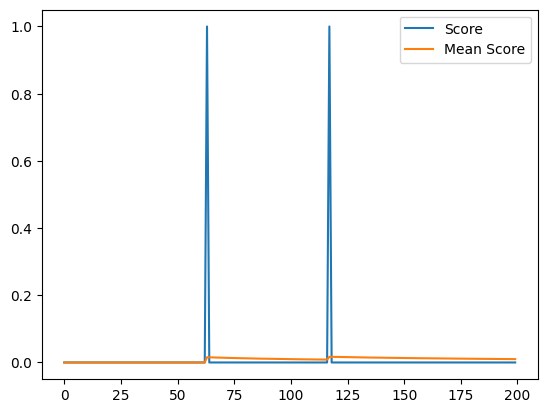

In [73]:
import matplotlib.pyplot as plt

plt.plot(scoresHistory)
plt.plot(meanScores)
plt.legend(["Score", "Mean Score"])